# Manipulation de données avec pandas (version courte)

[pandas](https://pandas.pydata.org/) est la librairie incontournable pour manipuler les données. Elle permet de manipuler aussi bien les données sous forme de tables qu'elle peut récupérer ou exporter en différents formats. Elle permet également de créer facilement des graphes.

In [30]:
%matplotlib inline

## Enoncé

La librairie [pandas](https://pandas.pydata.org/) implémente la classe [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). C'est une structure de table, chaque colonne porte un nom et contient un seul type de données. C'est très similaire au langage [SQL](https://fr.wikipedia.org/wiki/Structured_Query_Language).

### Création d'un dataframe

Il existe une grande variété pour créer un DataFrame. Voici les deux principaux. Le premier : une liste de dictionnaires. Chaque clé est le nom de la colonne.

In [31]:
from pandas import DataFrame

rows = [{"col1": 0.5, "col2": "schtroumph"}, {"col1": 0.6, "col2": "schtroumphette"}]
DataFrame(rows)

,col1,col2
0,0.5,schtroumph
1,0.6,schtroumphette


La lecture depuis un fichier :

In [88]:
text = """col1,col2
0.5,alpha
0.6,beta
"""

with open("data.csv", "w", encoding="utf-8") as f:
    f.write(text)

In [33]:
from pandas import read_csv

df = read_csv("data.csv")
df

,col1,col2
0,0.5,alpha
1,0.6,beta


### La maîtrise des index

Les index fonctionnent à peu près comme [numpy](https://numpy.org/) mais offre plus d'options puisque les colonnes mais aussi les lignes ont un nom.

Accès par colonne

In [34]:
df

,col1,col2
0,0.5,alpha
1,0.6,beta


In [35]:
df["col1"]

0    0.5
1    0.6
Name: col1, dtype: float64

Les colonnes disponibles :

In [36]:
df.columns

Index(['col1', 'col2'], dtype='object')

In [37]:
df[["col1", "col2"]]

,col1,col2
0,0.5,alpha
1,0.6,beta


Accès par ligne (uniquement avec ``:``). On se sert principalement de l'opérateur ``:`` pour les lignes.

In [38]:
df[:1]

,col1,col2
0,0.5,alpha


Accès par positions avec [loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html).

In [39]:
df.loc[0, "col1"]

0.5

Accès par positions entières avec [iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html).

In [40]:
df.iloc[0, 0]

0.5

### La maîtrise des index des lignes

La création d'un dataframe donne l'impression que les index des lignes sont des entiers mais cela peut être changer

In [41]:
df

,col1,col2
0,0.5,alpha
1,0.6,beta


In [42]:
dfi = df.set_index("col2")
dfi

,col1
col2,
alpha,0.5
beta,0.6


In [43]:
dfi.loc["alpha", "col1"]

0.5

Il faut se souvenir de cette particularité lors de la fusion de tables.

### La maîtrise des index des colonnes

Les colonnes sont nommées.

In [44]:
df.columns

Index(['col1', 'col2'], dtype='object')

On peut les renommer.

In [45]:
df.columns = ["valeur", "nom"]
df

,valeur,nom
0,0.5,alpha
1,0.6,beta


L'opérateur ``:`` peut également servir pour les colonnes.

In [46]:
df.loc[:, "valeur":"nom"]

,valeur,nom
0,0.5,alpha
1,0.6,beta


### Lien vers numpy

[pandas](https://pandas.pydata.org/) utilise [numpy](https://numpy.org/) pour stocker les données. Il est possible de récupérer des matrices depuis des DataFrame avec [values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html).

In [47]:
df.values

array([[0.5, 'alpha'],
       [0.6, 'beta']], dtype=object)

In [48]:
df[["valeur"]].values

array([[0.5],
       [0.6]])

### La maîtrise du nan

[nan](https://numpy.org/doc/stable/reference/constants.html) est une convention pour désigner une valeur manquante.

In [49]:
rows = [{"col1": 0.5, "col2": "schtroumph"}, {"col2": "schtroumphette"}]
DataFrame(rows)

,col1,col2
0,0.5,schtroumph
1,NaN,schtroumphette


### La maîtrise des types

Un dataframe est défini par ses dimensions et chaque colonne a un type potentiellement différent.

In [50]:
df.dtypes

valeur    float64
nom        object
dtype: object

On peut changer un type, donc convertir toutes les valeurs d'une colonne vers un autre type.

In [51]:
import numpy

df["valeur"].astype(numpy.float32)

0    0.5
1    0.6
Name: valeur, dtype: float32

In [52]:
import numpy

df["valeur"].astype(numpy.int32)

0    0
1    0
Name: valeur, dtype: int32

### Création de colonnes

On peut facilement créer de nouvelles colonnes.

In [53]:
df["sup055"] = df["valeur"] >= 0.55
df

,valeur,nom,sup055
0,0.5,alpha,False
1,0.6,beta,True


In [54]:
df["sup055"] = (df["valeur"] >= 0.55).astype(numpy.int64)
df

,valeur,nom,sup055
0,0.5,alpha,0
1,0.6,beta,1


In [55]:
df["sup055+"] = df["valeur"] + df["sup055"]
df

,valeur,nom,sup055,sup055+
0,0.5,alpha,0,0.5
1,0.6,beta,1,1.6


### Modifications de valeurs

On peut les modifier une à une en utilisant les index. Les notations sont souvent intuitives. Elles ne seront pas toutes détaillées. Ci-dessous un moyen de modifer certaines valeurs selon une condition.

In [56]:
df.loc[df["nom"] == "alpha", "sup055+"] += 1000
df

,valeur,nom,sup055,sup055+
0,0.5,alpha,0,1000.5
1,0.6,beta,1,1.6


### Une erreur ou warning fréquent

In [57]:
rows = [{"col1": 0.5, "col2": "schtroumph"}, {"col1": 1.5, "col2": "schtroumphette"}]
df = DataFrame(rows)
df

,col1,col2
0,0.5,schtroumph
1,1.5,schtroumphette


In [58]:
df1 = df[df["col1"] > 1.0]
df1

,col1,col2
1,1.5,schtroumphette


In [59]:
try:
    df1["col3"] = df1["col1"] + 1.0
except Exception as e:
    # un warning ou une exception selon la version de pandas installée
    print(e)
df1

/tmp/ipykernel_32232/3074685679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["col3"] = df1["col1"] + 1.0


,col1,col2,col3
1,1.5,schtroumphette,2.5


``A value is trying to be set on a copy of a slice from a DataFrame.`` : Par défaut, l'instruction ``df[df['col1'] > 1.]`` ne crée pas un nouveau DataFrame, elle crée ce qu'on appelle une vue pour éviter de copier les données. Le résultat ne contient que l'index des lignes qui ont été sélectionnées et un lien vers le dataframe original. L'avertissement stipule que *pandas* ne peut pas modifier le dataframe original mais qu'il doit effectuer une copie.

La solution pour faire disparaître ce warning est de copier le dataframe.

In [60]:
df2 = df1.copy()
df2["col3"] = df2["col1"] + 1.0

### La maîtrise des fonctions

Les fonctions de pandas créent par défaut un nouveau dataframe plutôt que de modifier un dataframe existant. Cela explique pourquoi parfois la mémoire se retrouve congestionnée. La page [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) est un bon début.

* **création** : [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), [read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)
* **index** : [set_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html), [reset_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)
* **utilitaires** : [astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html), [isna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html), [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html), [to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html), [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html), [shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html), [values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html), [head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html), [tail](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html), [isin](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html), [T](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.T.html), [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)
* **concaténation** : [concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)
* **SQL** : [filter](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html), [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html), [join](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html), [merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html), [pivot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html), [pivot_table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html)
* **calcul** : [sum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html), [cumsum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html), [quantile](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html), [var](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html)

### On récupère les données du COVID par région et par âge et premier graphe

A cette adresse : [Données hospitalières relatives à l'épidémie de COVID-19](https://www.data.gouv.fr/en/datasets/donnees-hospitalieres-relatives-a-lepidemie-de-covid-19/)

In [61]:
# https://www.data.gouv.fr/en/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7
from pandas import read_csv

url = "https://www.data.gouv.fr/en/datasets/r/08c18e08-6780-452d-9b8c-ae244ad529b3"
covid = read_csv(url, sep=";")
covid.tail()

,reg,cl_age90,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
219577,94,59,2023-03-31,1,0,0.0,1.0,0.0,387,14
219578,94,69,2023-03-31,16,1,8.0,5.0,2.0,536,48
219579,94,79,2023-03-31,29,1,14.0,13.0,1.0,810,129
219580,94,89,2023-03-31,35,0,24.0,11.0,0.0,888,199
219581,94,90,2023-03-31,18,0,6.0,12.0,0.0,388,121


In [62]:
covid.dtypes

reg           int64
cl_age90      int64
jour         object
hosp          int64
rea           int64
HospConv    float64
SSR_USLD    float64
autres      float64
rad           int64
dc            int64
dtype: object

Les dates sont considérées comme des chaînes de caractères. Il est plus simple pour réaliser des opérations de convertir la colonne sous forme de dates.

In [63]:
from pandas import to_datetime

covid["jour"] = to_datetime(covid["jour"])
covid.tail()

,reg,cl_age90,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
219577,94,59,2023-03-31,1,0,0.0,1.0,0.0,387,14
219578,94,69,2023-03-31,16,1,8.0,5.0,2.0,536,48
219579,94,79,2023-03-31,29,1,14.0,13.0,1.0,810,129
219580,94,89,2023-03-31,35,0,24.0,11.0,0.0,888,199
219581,94,90,2023-03-31,18,0,6.0,12.0,0.0,388,121


In [64]:
covid.dtypes

reg                  int64
cl_age90             int64
jour        datetime64[ns]
hosp                 int64
rea                  int64
HospConv           float64
SSR_USLD           float64
autres             float64
rad                  int64
dc                   int64
dtype: object

On supprime les colonnes relatives aux régions et à l'âge puis on aggrège par jour.

In [65]:
agg_par_jour = covid.drop(["reg", "cl_age90"], axis=1).groupby("jour").sum()
agg_par_jour.tail()

,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
jour,,,,,,,
2023-03-27,26110,1452,14586.0,9311.0,761.0,1717663,271176
2023-03-28,26239,1435,14707.0,9336.0,761.0,1718630,271254
2023-03-29,26255,1465,14704.0,9323.0,763.0,1719634,271322
2023-03-30,26253,1460,14680.0,9344.0,769.0,1720370,271394
2023-03-31,26174,1413,14658.0,9354.0,749.0,1721380,271456


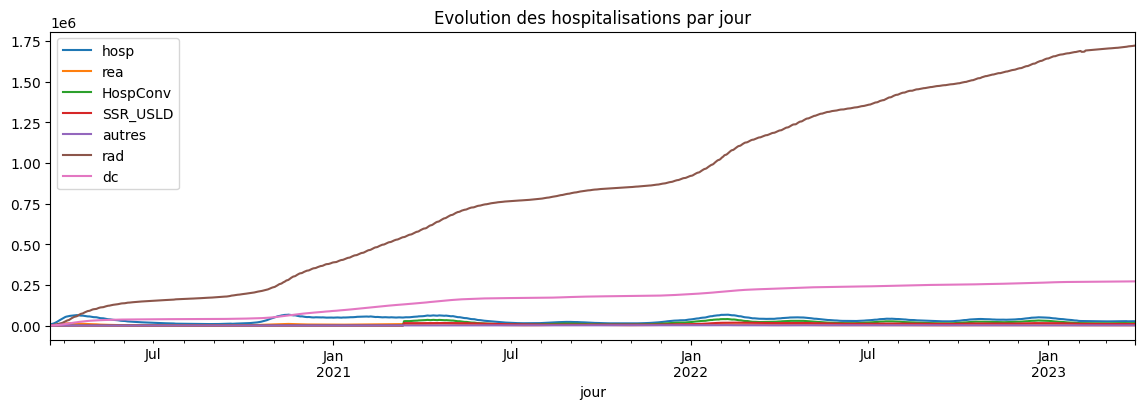

In [66]:
agg_par_jour.plot(title="Evolution des hospitalisations par jour", figsize=(14, 4));

Avec échelle logarithmique.

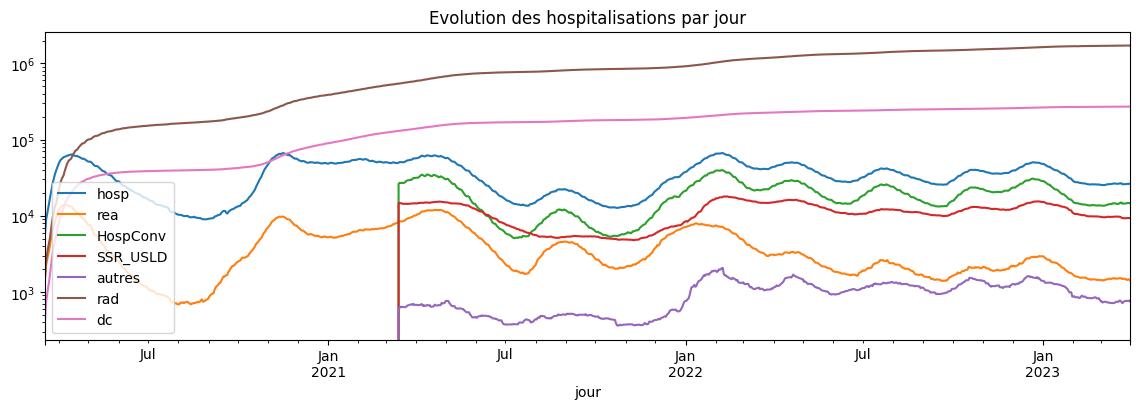

In [67]:
agg_par_jour.plot(
    title="Evolution des hospitalisations par jour", figsize=(14, 4), logy=True
);

### Q1 : refaire le graphique précédent pour votre classe d'âge

### Q2 : faire de même avec les séries différenciées

### Q3 : faire de même avec des séries lissées sur sur 7 jours

### Q4 : fusion de tables par départements

## Réponses

### Q1 : refaire le graphique précédent pour votre classe d'âge

In [68]:
set(covid["cl_age90"])

{0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 90}

In [69]:
covid49 = covid[covid.cl_age90 == 49]
agg_par_jour49 = covid49.drop(["reg", "cl_age90"], axis=1).groupby("jour").sum()
agg_par_jour49.tail()

,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
jour,,,,,,,
2023-03-27,372,29,180.0,110.0,53.0,57846,1554
2023-03-28,377,29,184.0,111.0,53.0,57859,1554
2023-03-29,374,32,177.0,109.0,56.0,57877,1554
2023-03-30,375,34,175.0,111.0,55.0,57889,1554
2023-03-31,373,33,177.0,109.0,54.0,57900,1554


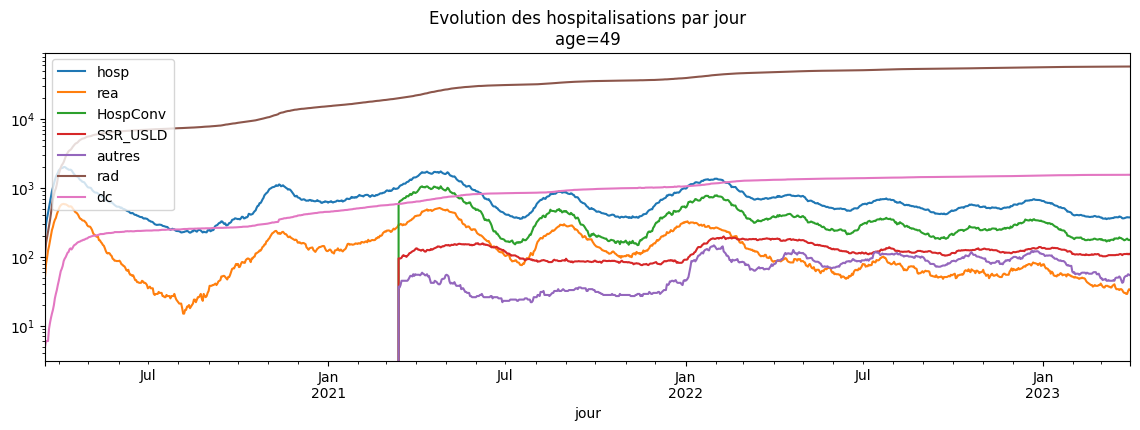

In [70]:
agg_par_jour49.plot(
    title="Evolution des hospitalisations par jour\nage=49", figsize=(14, 4), logy=True
);

### Q2 : faire de même avec les séries différenciées

In [71]:
covid.tail()

,reg,cl_age90,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
219577,94,59,2023-03-31,1,0,0.0,1.0,0.0,387,14
219578,94,69,2023-03-31,16,1,8.0,5.0,2.0,536,48
219579,94,79,2023-03-31,29,1,14.0,13.0,1.0,810,129
219580,94,89,2023-03-31,35,0,24.0,11.0,0.0,888,199
219581,94,90,2023-03-31,18,0,6.0,12.0,0.0,388,121


In [72]:
diff = covid.drop(["reg", "cl_age90"], axis=1).groupby(["jour"]).sum().diff()
diff.tail(n=2)

,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
jour,,,,,,,
2023-03-30,-2.0,-5.0,-24.0,21.0,6.0,736.0,72.0
2023-03-31,-79.0,-47.0,-22.0,10.0,-20.0,1010.0,62.0


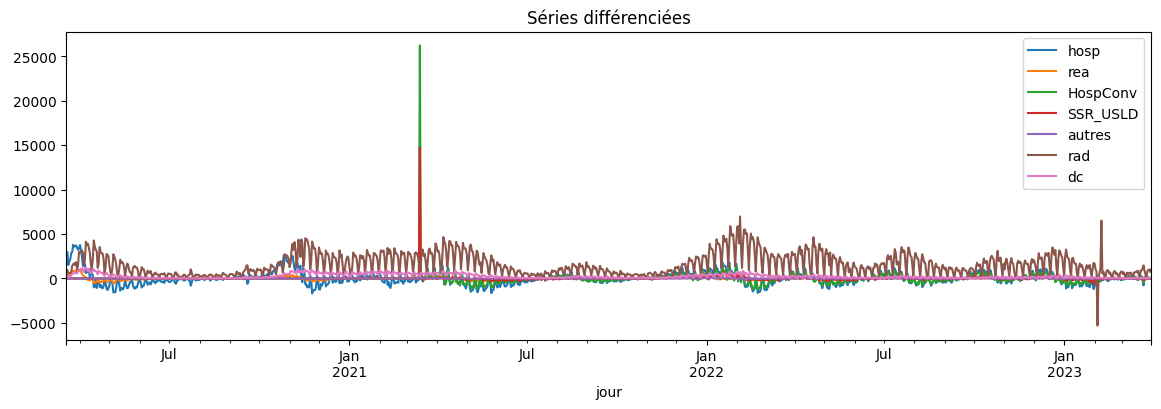

In [73]:
diff.plot(title="Séries différenciées", figsize=(14, 4));

### Q3 : faire de même avec des séries lissées sur sur 7 jours

In [74]:
diff.rolling(7)

Rolling [window=7,center=False,axis=0,method=single]

In [75]:
roll = diff.rolling(7).mean()
roll.tail(n=2)

,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
jour,,,,,,,
2023-03-30,45.0,-2.000000,34.857143,4.142857,8.000000,701.571429,52.857143
2023-03-31,12.0,-12.142857,18.142857,3.142857,2.857143,719.571429,57.428571


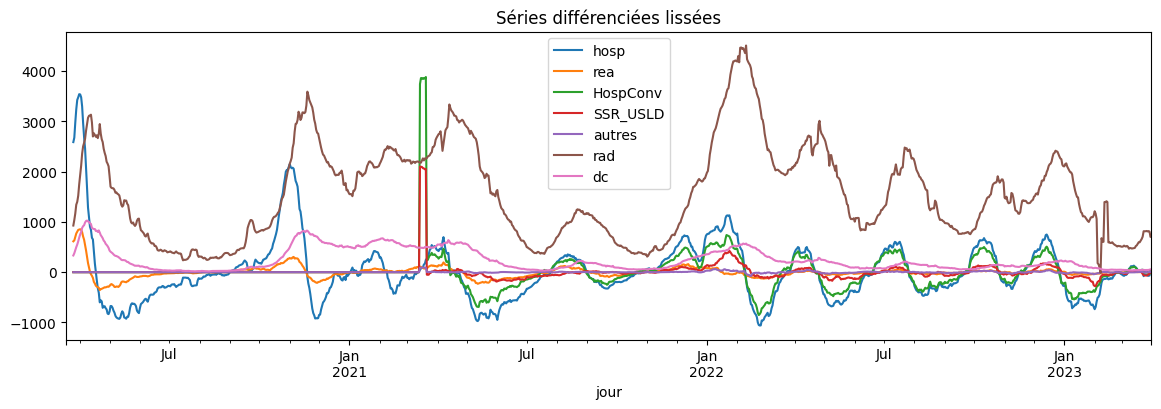

In [76]:
roll.plot(title="Séries différenciées lissées", figsize=(14, 4));

### Petit aparté

On veut savoir combien de temps les gens restent à l'hôpital avant de sortir, en supposant que le temps de guérison est à peu près identique au temps passé lorsque l'issue est tout autre. Je pensais calculer les corrélations entre la série des décès et celles de réanimations décalées de plusieurs jours en me disant qu'un pic de corrélation pourrait indiquer une sorte de durée moyenne de réanimation.

In [77]:
data = agg_par_jour49.diff().rolling(7).mean()
data.tail(n=2)

,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
jour,,,,,,,
2023-03-30,1.714286,0.142857,-1.000000,0.714286,1.857143,11.285714,0.285714
2023-03-31,1.571429,0.285714,-0.285714,0.000000,1.571429,10.714286,0.285714


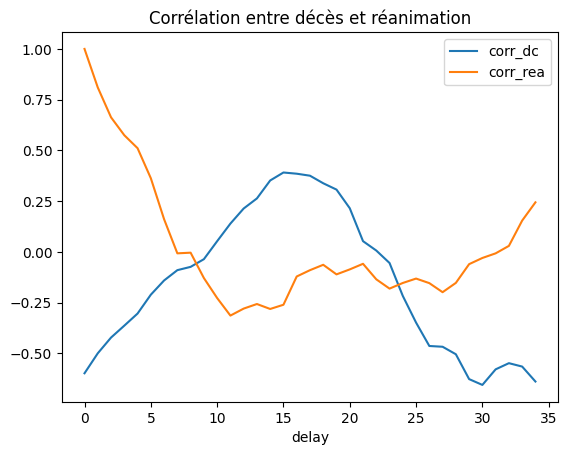

In [78]:
data_last = data.tail(n=90)
cor = []
for i in range(0, 35):
    ts = DataFrame(
        dict(
            rea=data_last.rea,
            dc=data_last.dc,
            dclag=data_last["dc"].shift(i),
            realag=data_last["rea"].shift(i),
        )
    )
    ts_cor = ts.corr()
    cor.append(dict(delay=i, corr_dc=ts_cor.iloc[1, 3], corr_rea=ts_cor.iloc[0, 3]))
DataFrame(cor).set_index("delay").plot(title="Corrélation entre décès et réanimation");

Il apparaît que ces corrélations sont très différentes selon qu'on les calcule sur les dernières données et les premières semaines. Cela semblerait indiquer que les données médicales sont très différentes. On pourrait chercher plusieurs jours mais le plus simple serait sans de générer des données artificielles avec un modèle [SIR](https://fr.wikipedia.org/wiki/Mod%C3%A8les_compartimentaux_en_%C3%A9pid%C3%A9miologie) et vérifier si ce raisonnement tient la route sur des données propres.

### Q4 : fusion de tables par départements

On récupère deux jeux de données :
* [Données hospitalières relatives à l'épidémie de COVID-19](https://www.data.gouv.fr/en/datasets/donnees-hospitalieres-relatives-a-lepidemie-de-covid-19/)
* [Indicateurs de suivi de l’épidémie de COVID-19](https://www.data.gouv.fr/fr/datasets/indicateurs-de-suivi-de-lepidemie-de-covid-19/)

In [79]:
hosp = read_csv(
    "https://www.data.gouv.fr/en/datasets/r/63352e38-d353-4b54-bfd1-f1b3ee1cabd7",
    sep=";",
)
hosp.tail()

,dep,sexe,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
338240,976,0,2023-03-31,0,0,0.0,0.0,0.0,1766,163
338241,976,1,2023-03-31,0,0,0.0,0.0,0.0,739,100
338242,976,2,2023-03-31,0,0,0.0,0.0,0.0,1002,61
338243,978,0,2023-03-31,0,0,0.0,0.0,0.0,0,0
338244,978,1,2023-03-31,0,0,0.0,0.0,0.0,0,0


In [80]:
indic = read_csv(
    "https://www.data.gouv.fr/fr/datasets/r/4acad602-d8b1-4516-bc71-7d5574d5f33e",
    encoding="ISO-8859-1",
)
indic.tail()

/tmp/ipykernel_32232/1911493942.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  indic = read_csv(


,extract_date,departement,region,libelle_reg,libelle_dep,tx_incid,R,taux_occupation_sae,tx_pos,tx_incid_couleur,R_couleur,taux_occupation_sae_couleur,tx_pos_couleur,nb_orange,nb_rouge
90390,2020-08-22,84,93,Provence Alpes CÃ´te d'Azur,Vaucluse,44.21,NaN,6.3,3.721489,orange,NaN,vert,vert,1,0
90391,2020-08-23,84,93,Provence Alpes CÃ´te d'Azur,Vaucluse,44.21,NaN,6.7,3.719256,orange,NaN,vert,vert,1,0
90392,2020-08-28,84,93,Provence Alpes CÃ´te d'Azur,Vaucluse,60.61,1.37,9.3,4.524887,rouge,orange,vert,vert,1,1
90393,2020-08-29,84,93,Provence Alpes CÃ´te d'Azur,Vaucluse,61.14,NaN,9.1,4.566028,rouge,NaN,vert,vert,0,1
90394,2020-08-30,84,93,Provence Alpes CÃ´te d'Azur,Vaucluse,61.50,NaN,9.1,4.570747,rouge,NaN,vert,vert,0,1


Le code suivant explique comment trouver la valeur ``ISO-8859-1``.

In [81]:
# import chardet
# with open("indicateurs-covid19-dep.csv", "rb") as f:
#     content = f.read()
# chardet.detect(content)  # {'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

### Q5 : une carte ?

Tracer une carte n'est jamais simple. Il faut tout d'abord récupérer les coordonnées des départements : [Contours des départements français issus d'OpenStreetMap](https://www.data.gouv.fr/en/datasets/contours-des-departements-francais-issus-d-openstreetmap/). Ensuite... de ces fichiers ont été extraits les barycentres de chaque département français : [departement_french_2018.csv](https://github.com/sdpython/teachpyx/raw/main/_data/departement_french_2018.csv). Ce qui suit est une approximation de carte : on suppose que là où se trouve, les coordonnées longitude et latitude ne sont pas trop éloignées de ce qu'elles pourraient être si elles étaient projetées sur une sphère.

In [82]:
dep_pos = read_csv(
    "https://github.com/sdpython/teachpyx/raw/main/_data/departement_french_2018.csv"
)
dep_pos.tail()

,code_insee,nom,nuts3,wikipedia,surf_km2,DEPLONG,DEPLAT
97,56,Morbihan,FR524,fr:Morbihan,6870.0,-2.812320,47.846846
98,25,Doubs,FR431,fr:Doubs (département),5256.0,6.362722,47.165964
99,39,Jura,FR432,fr:Jura (département),5049.0,5.697361,46.729368
100,07,Ardèche,FR712,fr:Ardèche (département),5566.0,4.425582,44.752771
101,30,Gard,FR812,fr:Gard,5875.0,4.179861,43.993601


In [83]:
last_extract_date = max(set(indic.extract_date))
last_extract_date

'2022-08-29'

In [84]:
indic_last = indic[indic.extract_date == last_extract_date]
merge = indic_last.merge(dep_pos, left_on="departement", right_on="code_insee")
final = merge[["code_insee", "nom", "DEPLONG", "DEPLAT", "taux_occupation_sae", "R"]]
metro = final[final.DEPLAT > 40]
metro

,code_insee,nom,DEPLONG,DEPLAT,taux_occupation_sae,R
0,01,Ain,5.348764,46.099799,10.9,NaN
1,03,Allier,3.187644,46.393637,10.9,NaN
2,07,Ardèche,4.425582,44.752771,10.9,NaN
3,15,Cantal,2.669045,45.051247,10.9,NaN
4,26,Drôme,5.167364,44.685239,10.9,NaN
...,...,...,...,...,...,...
67,23,Creuse,2.018230,46.090620,18.7,NaN
68,24,Dordogne,0.741203,45.104948,18.7,NaN
69,33,Gironde,-0.575870,44.823614,18.7,NaN
70,40,Landes,-0.783793,43.965855,18.7,NaN


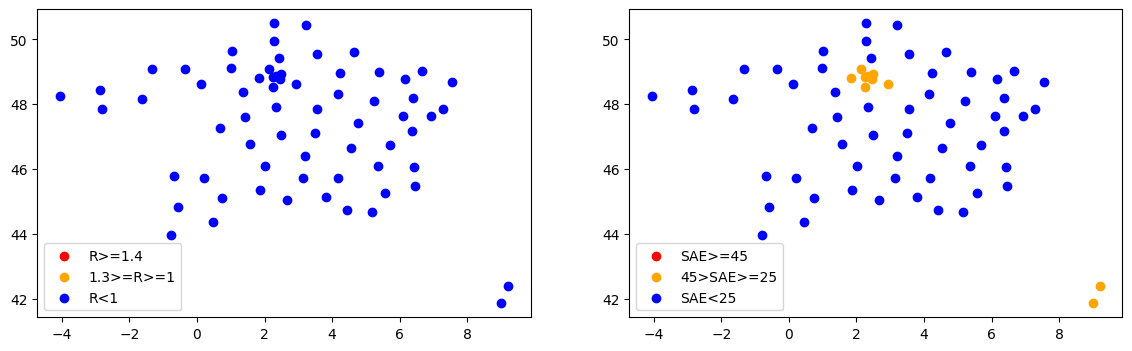

In [85]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
bigR1 = metro.R >= 1
bigR2 = metro.R >= 1.4
ax[0].scatter(
    metro.loc[bigR2, "DEPLONG"], metro.loc[bigR2, "DEPLAT"], c="red", label="R>=1.4"
)
ax[0].scatter(
    metro.loc[bigR1 & ~bigR2, "DEPLONG"],
    metro.loc[bigR1 & ~bigR2, "DEPLAT"],
    c="orange",
    label="1.3>=R>=1",
)
ax[0].scatter(
    metro.loc[~bigR1, "DEPLONG"], metro.loc[~bigR1, "DEPLAT"], c="blue", label="R<1"
)
ax[0].legend()

bigR1 = metro.taux_occupation_sae >= 25
bigR2 = metro.taux_occupation_sae >= 45
ax[1].scatter(
    metro.loc[bigR2, "DEPLONG"], metro.loc[bigR2, "DEPLAT"], c="red", label="SAE>=45"
)
ax[1].scatter(
    metro.loc[bigR1 & ~bigR2, "DEPLONG"],
    metro.loc[bigR1 & ~bigR2, "DEPLAT"],
    c="orange",
    label="45>SAE>=25",
)
ax[1].scatter(
    metro.loc[~bigR1, "DEPLONG"], metro.loc[~bigR1, "DEPLAT"], c="blue", label="SAE<25"
)
ax[1].legend();

In [86]:
metro[metro.nom == "Ardennes"]

,code_insee,nom,DEPLONG,DEPLAT,taux_occupation_sae,R
31,08,Ardennes,4.640751,49.616226,13.5,NaN
